In [1]:
# Import necessary libraries:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt 

In [3]:
# Example data:
data = {
    "House_studied": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "passed": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]   
}

In [4]:
data

{'House_studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]}

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,House_studied,passed
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [7]:
# Independent variable (feature) and dependent variable (target):
x = df[["House_studied"]]
y = df["passed"]

In [8]:
x

,House_studied
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [9]:
y

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: passed, dtype: int64

In [10]:
# Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [11]:
# Creating and training the logistic regression model:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Making prediction:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [17]:
# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [18]:
# print this output:
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"Classification report: \n{class_report}")
print(f"ROC-AUC: \n{roc_auc}")

Confusion Matrix: 
[[1 0]
 [0 1]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

ROC-AUC: 
1.0


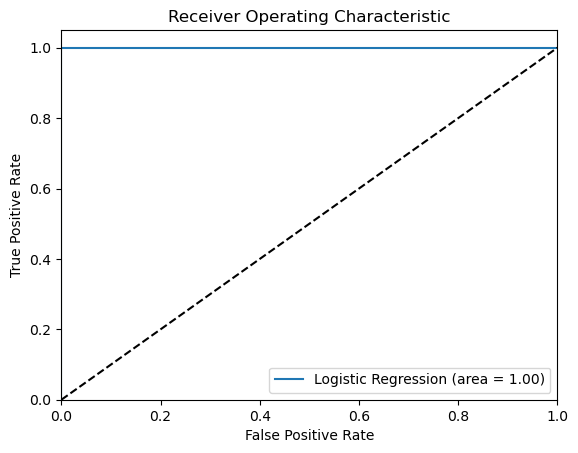

In [19]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()